<a href="https://colab.research.google.com/github/Tina-Mulu/K-Means-Clustering-and-Hierarchial-Clustering/blob/main/K_means_and_Hierarchial_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Problem Definition**

Kira Plastinina is a Russian brand that is sold through a defunct chain of retail stores in Russia, Ukraine, Kazakhstan, Belarus, China, Philippines, and Armenia. The brand’s Sales and Marketing team would like to understand their customer’s behavior from data that they have collected over the past year. More specifically, they would like to learn the characteristics of customer groups.

Perform clustering stating insights drawn from your analysis and visualizations.
Upon implementation, provide comparisons between the approaches learned this week i.e. K-Means clustering vs Hierarchical clustering highlighting the strengths and limitations of each approach in the context of your analysis. 

# **2.Data Sourcing**

The dataset for this project can be found here [http://bit.ly/EcommerceCustomersDataset]. 

# **3. Check the Data**

In [2]:
#loading the dataset
data <- read.csv("online_shoppers_intention.csv")
head(data)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<chr>,<lgl>,<lgl>
1,0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
2,0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
3,0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
4,0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
5,0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
6,0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


# **4. Cleaning the data**

In [ ]:
# Checking for null values
is.na(data)

In [4]:
colSums(is.na(data))

Administrative Administrative_Duration           Informational 
                     14                      14                      14 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                     14                      14                      14 
            BounceRates               ExitRates              PageValues 
                     14                      14                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

In [5]:
# dealing with null values
data1 <- na.omit(data)

In [6]:
#checking for duplicates
duplicated_rows <- data1[duplicated(data1),]

In [7]:
# dealing with duplicates
duplicated(data1)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [157] FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
  [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
  [421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [457]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [481] FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
  [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [553] FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [589] FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [6

In [8]:
install.packages("dplyr")
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
data1 %>% distinct()
dim(data1)

#5. **Explaratory Data Analysis**

**Univariate Data Analysis**

Month
 Aug  Dec  Feb  Jul June  Mar  May  Nov  Oct  Sep 
 433 1727  184  432  288 1907 3364 2998  549  448 

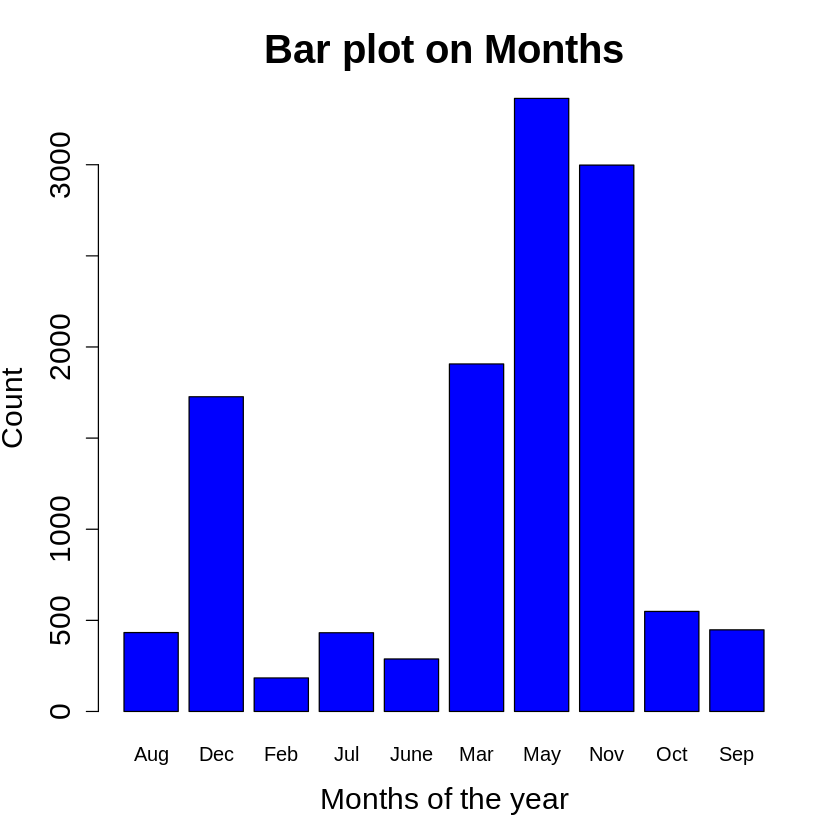

In [60]:
#Creating bar plot on months of the year
#


Month <- data$Month
Month_frequency <- table(Month)
Month_frequency

#Creating a bar plot to reflect the same
barplot(Month_frequency,
main = 'Bar plot on Months',
xlab = 'Months of the year',
ylab = 'Count',
col = 'Blue',
cex.lab=1.5, cex.axis=1.5, cex.main=2.0, cex.sub=1.5)

#Most time was spent on the site during the months of May and November

visitor
      New_Visitor             Other Returning_Visitor 
             1694                85             10551 

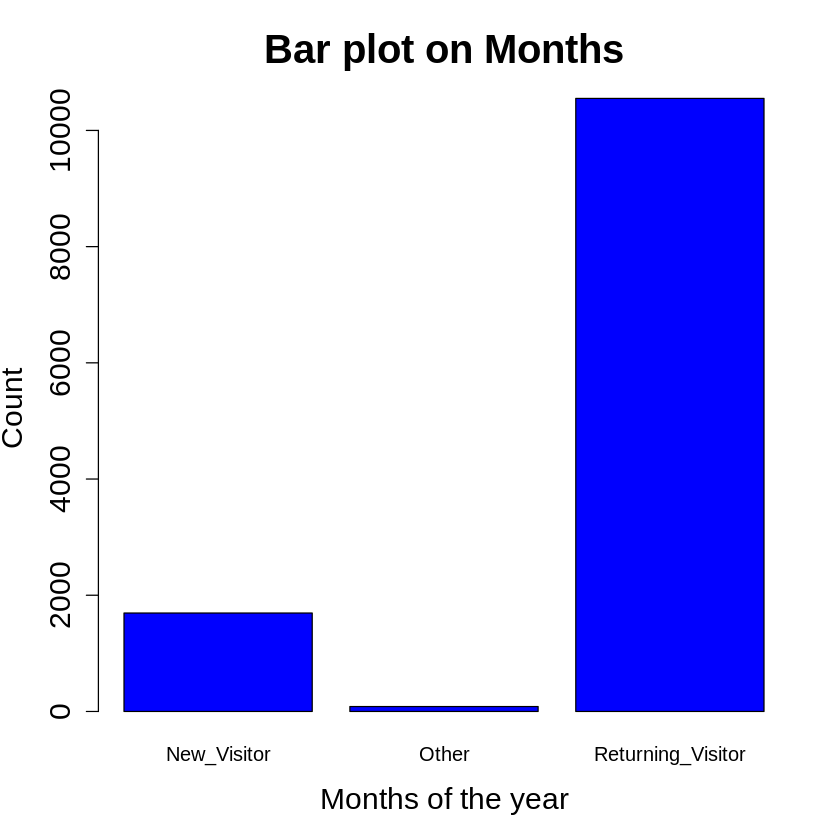

In [62]:

#Bar plot on the regions
#


visitor <- data$VisitorType
visitor_frequency <- table(visitor)
visitor_frequency

#Creating a bar plot to reflect the same
barplot(visitor_frequency,
main = 'Bar plot on Months',
xlab = 'Months of the year',
ylab = 'Count',
col = 'Blue',
cex.lab=1.5, cex.axis=1.5, cex.main=2.0, cex.sub=1.5)

#Most customers were Returning Visitors

In [ ]:
#Histogram on exit rates

hist(Brand$ExitRates,
main = "Histogram on exit rates",
xlab = "Exit rates",
ylab = 'Frequency',
col = 'Violet',
cex.lab=1.5, cex.axis=1.5, cex.main=2.0, cex.sub=1.5
Audrey Imali2:21 PM
#Plotting the distribution on administrative duration
#

plot(density(Brand$BounceRates),
main = 'Distribution on Bounce rates',
xlab = 'Bounce rates',
cex.lab=1.5, cex.axis=1.5, cex.main=2.0, cex.sub=1.5)
#Creating correlation matrix
correlation <- cor(Continuous_Variables)
correlation

#Creating a correlogram
install.packages("corrplot")
library(corrplot)
corrplot(correlation, type = "upper", order = "hclust",main = 'Correlogram plot on correlations', 
         tl.col = "black", tl.srt = 45)
Audrey Imali2:22 PM
# Stacked Bar Plot on months and revenue
#

counts <- table(Brand$Revenue, Brand$Month)
barplot(counts, main="Barplot on Month and Revenue",
xlab="Months", ylab = 'Count', col=c("darkblue","red"),
cex.lab=1.5, cex.axis=1.5, cex.main=1.6, cex.sub=1.5,
legend = rownames(counts))

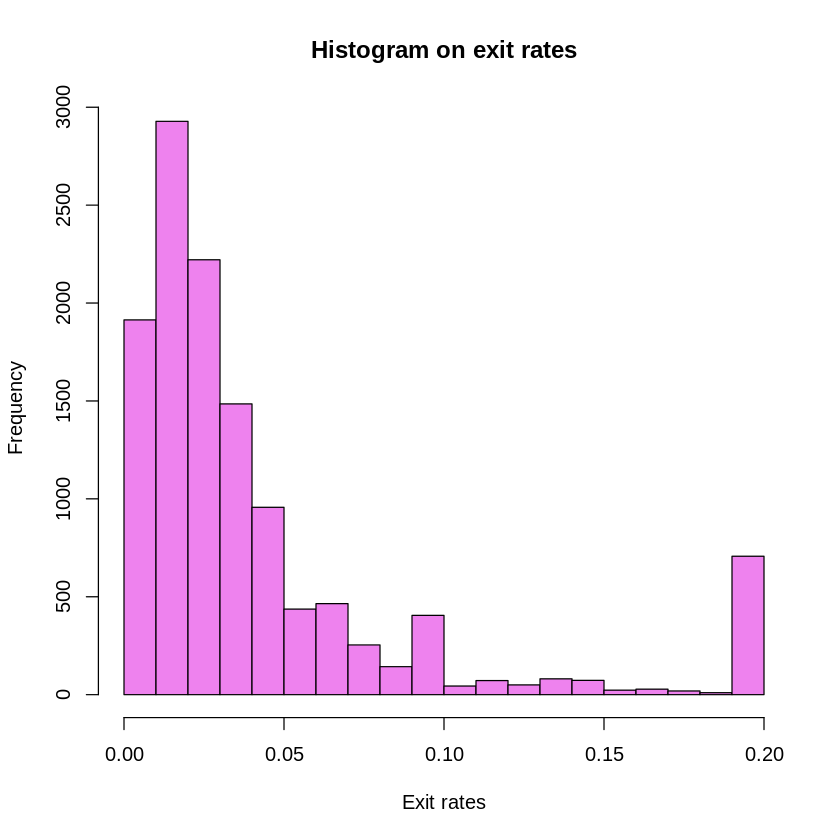

In [66]:
#Histogram on exit rates

hist(data$ExitRates,
main = "Histogram on exit rates",
xlab = "Exit rates",
ylab = 'Frequency',
col = 'Violet')
#cex.lab=1.5, cex.axis=1.5, cex.main=2.0, cex.sub=1.5

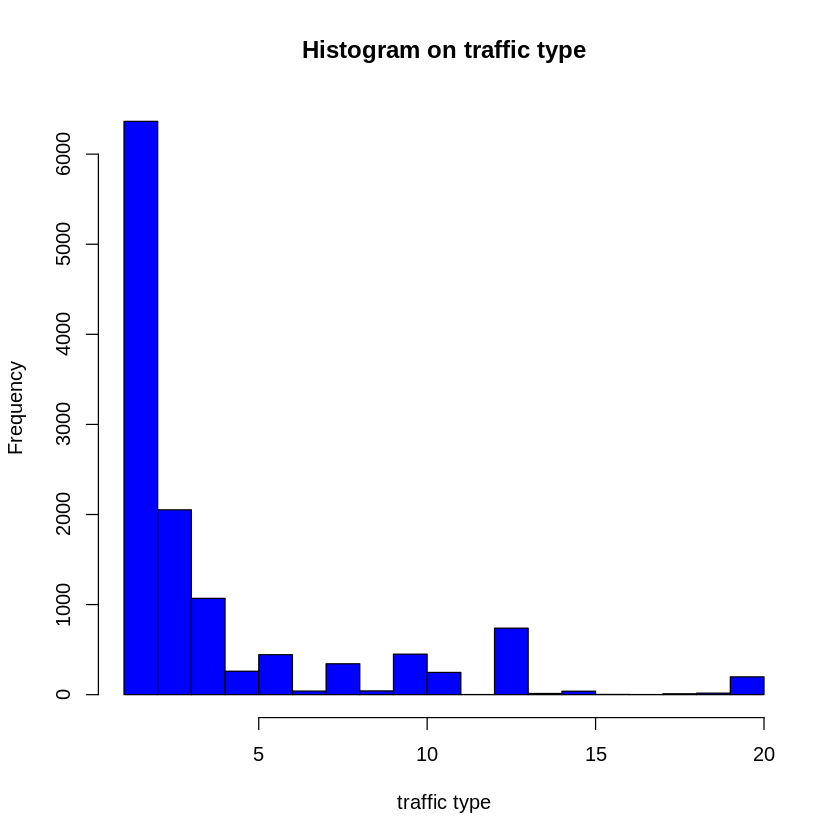

In [71]:
#Histogram on Traffic Type
hist(data$TrafficType,
main = "Histogram on traffic type",
xlab = "traffic type",
ylab = 'Frequency',
col = 'blue')

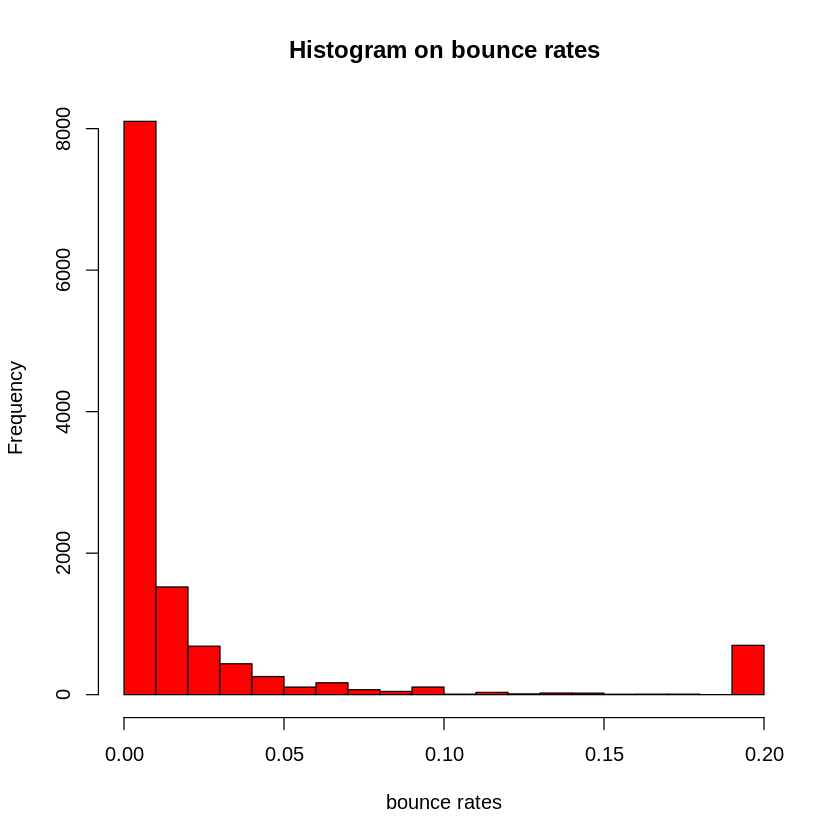

In [72]:
# Histogram on Bounce rates
hist(data$BounceRates,
main = "Histogram on bounce rates",
xlab = "bounce rates",
ylab = 'Frequency',
col = 'red')

**Bivariate Analysis**

In [76]:
# Finding the Covariance between Bounce rates and Exit rates
bounce <- data1$BounceRates
exit<- data1$ExitRates

# Using the cov() function to determine the covariance between exit and bounce rates
cov(bounce, exit)

# there is a positive linear relationshipbetween the two

[1] 0.00214661

In [99]:
summary(data2)

 Administrative    Administrative_Duration Informational    
 Min.   :-0.6976   Min.   :-0.46311        Min.   :-0.3966  
 1st Qu.:-0.6976   1st Qu.:-0.45746        1st Qu.:-0.3966  
 Median :-0.3966   Median :-0.41222        Median :-0.3966  
 Mean   : 0.0000   Mean   : 0.00000        Mean   : 0.0000  
 3rd Qu.: 0.5063   3rd Qu.: 0.07121        3rd Qu.:-0.3966  
 Max.   : 7.4282   Max.   :18.75967        Max.   :18.4906  
 Informational_Duration ProductRelated    ProductRelated_Duration
 Min.   :-0.2521        Min.   :-0.7139   Min.   :-0.6253        
 1st Qu.:-0.2450        1st Qu.:-0.5566   1st Qu.:-0.5281        
 Median :-0.2450        Median :-0.3094   Median :-0.3115        
 Mean   : 0.0000        Mean   : 0.0000   Mean   : 0.0000        
 3rd Qu.:-0.2450        3rd Qu.: 0.1402   3rd Qu.: 0.1413        
 Max.   :17.8581        Max.   :15.1322   Max.   :32.7927        
  BounceRates        ExitRates         PageValues        SpecialDay    
 Min.   :-0.4574   Min.   :-0.8862   Mi

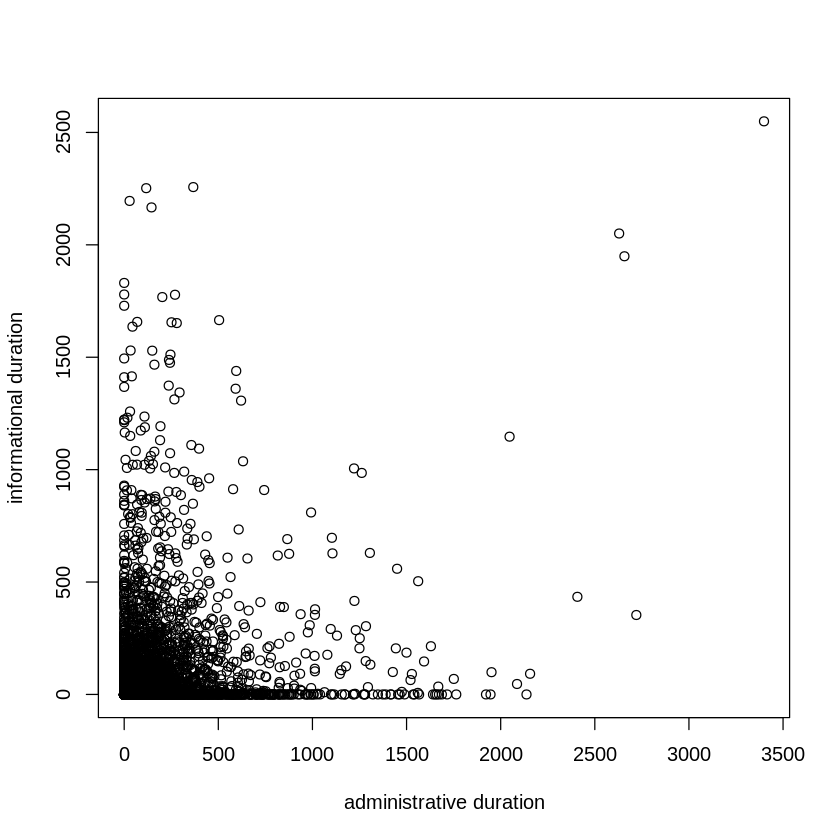

In [88]:
# Creating the scatter plot using region and traffic type
# ---
# 
admin <- data$Administrative_Duration
inform <- data$Informational_Duration
plot(admin, inform, xlab="administrative duration", ylab="informational duration")
# there is a positive correlation between the two


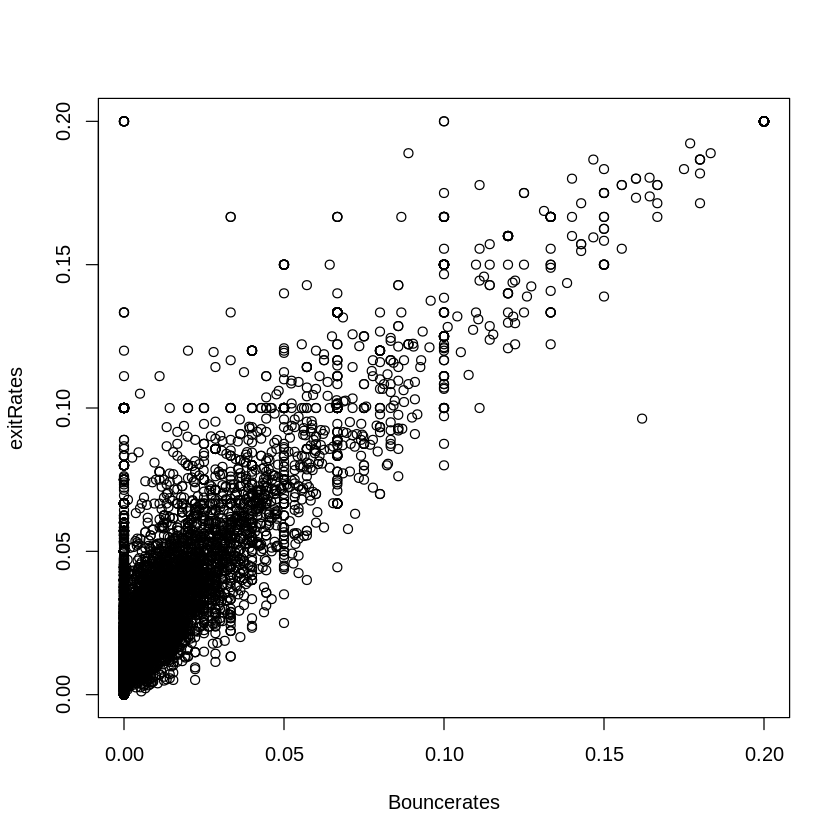

In [89]:
plot(bounce, exit, xlab="Bouncerates", ylab="exitRates")

#there is a positive relation between the two variables

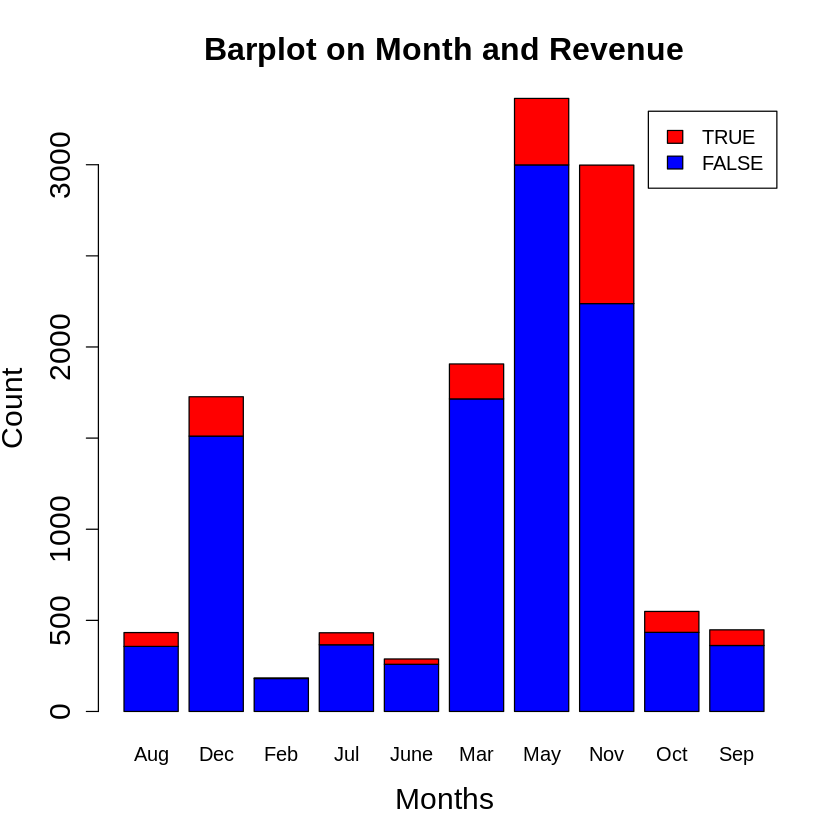

In [93]:
# Stacked Bar Plot on months and revenue
#

counts <- table(data$Revenue, data$Month)
barplot(counts, main="Barplot on Month and Revenue",
xlab="Months", ylab = 'Count', col=c("blue","red"),
cex.lab=1.5, cex.axis=1.5, cex.main=1.6, cex.sub=1.5,
legend = rownames(counts))

# 6.**Feature Engineering**

In [15]:
# Enncoding the dataset
install.packages('dummies')
library(dummies)
data1 <- dummy.data.frame(data1, names=c("Month","VisitorType","Weekend","Revenue"), sep="_")
head(data1)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

dummies-1.5.6 provided by Decision Patterns


Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,⋯,Browser,Region,TrafficType,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_FALSE,Weekend_TRUE,Revenue_FALSE,Revenue_TRUE
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,⋯,1,1,1,0,0,1,1,0,1,0
2,0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,⋯,2,1,2,0,0,1,1,0,1,0
3,0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,⋯,1,9,3,0,0,1,1,0,1,0
4,0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,⋯,2,2,4,0,0,1,1,0,1,0
5,0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,⋯,3,1,4,0,0,1,0,1,1,0
6,0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,⋯,2,1,3,0,0,1,1,0,1,0


# **Kmeans clustering**

In [16]:
# Viewing the statistical summary of the dataset
# ---
# 
summary(data1) 



 Administrative   Administrative_Duration Informational   
 Min.   : 0.000   Min.   :  -1.00         Min.   : 0.000  
 1st Qu.: 0.000   1st Qu.:   0.00         1st Qu.: 0.000  
 Median : 1.000   Median :   8.00         Median : 0.000  
 Mean   : 2.318   Mean   :  80.91         Mean   : 0.504  
 3rd Qu.: 4.000   3rd Qu.:  93.50         3rd Qu.: 0.000  
 Max.   :27.000   Max.   :3398.75         Max.   :24.000  
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  7.00   1st Qu.:  185.0        
 Median :   0.00        Median : 18.00   Median :  599.8        
 Mean   :  34.51        Mean   : 31.76   Mean   : 1196.0        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1466.5        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
  BounceRates         ExitRates         PageValues        SpecialDay    
 Min.   :0.000000   Min.   :0.00000   Min.   :  0.000   Min

In [17]:
#Checking the data types
str(data1)


'data.frame':	12316 obs. of  31 variables:
 $ Administrative               : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration      : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational                : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration       : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated               : int  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration      : num  0 64 -1 2.67 627.5 ...
 $ BounceRates                  : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates                    : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues                   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay                   : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month_Aug                    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Month_Dec                    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Month_Feb                    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Month_Jul                    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Month_June                   : int  0 0 0 0 0 0 0 0 0 0 .

In [23]:
# scaling our dataset
data2 <- as.data.frame(scale(data1))
head(data2)

#winesNorm <- as.data.frame(scale(wines))
#head(winesNorm)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,⋯,Browser,Region,TrafficType,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_FALSE,Weekend_TRUE,Revenue_FALSE,Revenue_TRUE
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.6975533,-0.4574578,-0.3966145,-0.2450294,-0.6914734,-0.6247671,3.67247746,3.2352400,-0.3173633,-0.309001,⋯,-0.7901988,-0.8941841,-0.76292777,-0.3993337,-0.0833606,0.410877,0.5505615,-0.5505615,0.4281421,-0.4281421
2,-0.6975533,-0.4574578,-0.3966145,-0.2450294,-0.6689966,-0.5913358,-0.45743910,1.1745443,-0.3173633,-0.309001,⋯,-0.2081361,-0.8941841,-0.51445574,-0.3993337,-0.0833606,0.410877,0.5505615,-0.5505615,0.4281421,-0.4281421
3,-0.6975533,-0.4631119,-0.3966145,-0.2521304,-0.6914734,-0.6252895,3.67247746,3.2352400,-0.3173633,-0.309001,⋯,-0.7901988,2.4360812,-0.26598370,-0.3993337,-0.0833606,0.410877,0.5505615,-0.5505615,0.4281421,-0.4281421
4,-0.6975533,-0.4574578,-0.3966145,-0.2450294,-0.6689966,-0.6233742,0.57504004,1.9988226,-0.3173633,-0.309001,⋯,-0.2081361,-0.4779009,-0.01751167,-0.3993337,-0.0833606,0.410877,0.5505615,-0.5505615,0.4281421,-0.4281421
5,-0.6975533,-0.4574578,-0.3966145,-0.2450294,-0.4891823,-0.2969835,-0.04444744,0.1441964,-0.3173633,-0.309001,⋯,0.3739266,-0.8941841,-0.01751167,-0.3993337,-0.0833606,0.410877,-1.8161802,1.8161802,0.4281421,-0.4281421
6,-0.6975533,-0.4574578,-0.3966145,-0.2450294,-0.2868911,-0.5442099,-0.13139305,-0.3800157,-0.3173633,-0.309001,⋯,-0.2081361,-0.8941841,-0.26598370,-0.3993337,-0.0833606,0.410877,0.5505615,-0.5505615,0.4281421,-0.4281421


In [ ]:
# Computing the k-means Clustering in R
set.seed(123)

data_K2 <- kmeans(data2, centers = 3, nstart = 25)
print(data_K2)

In [27]:
install.packages("factoextra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’




In [29]:
library(factoextra)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



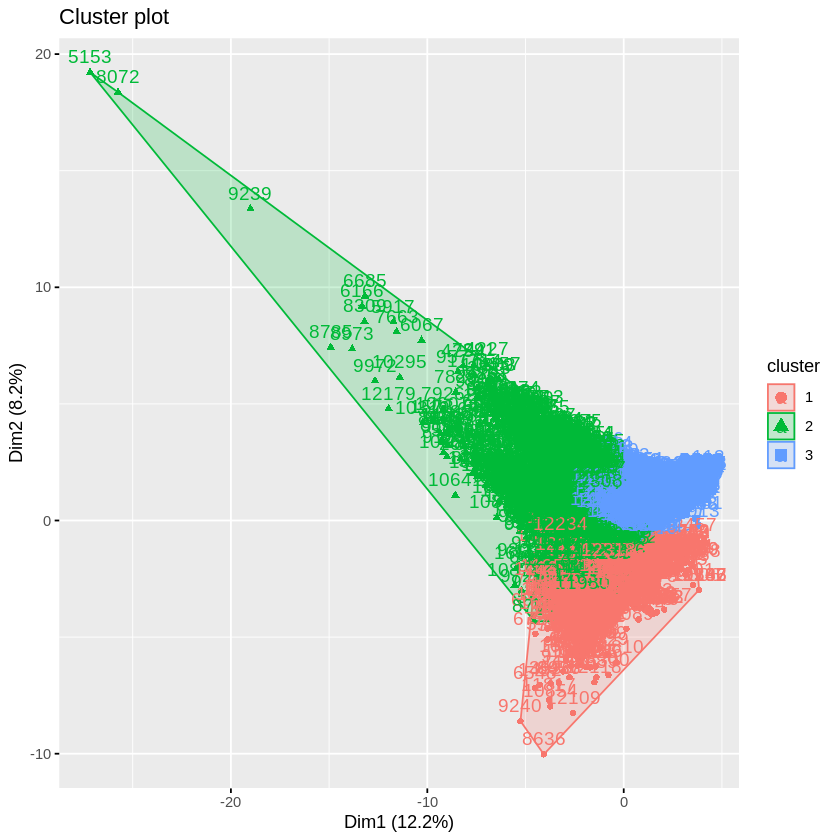

In [30]:
# visualizing the cluster created
fviz_cluster(data_K2, data = data2)


In [31]:
data_K2$cluster

1     2     3     4     5     6     7     8     9    10    11    12    13 
    3     3     3     3     3     3     3     3     3     3     3     3     3 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
    3     3     3     3     3     3     3     3     3     3     3     3     3 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
    3     3     3     3     3     3     3     3     3     3     3     3     3 
   40    41    42    43    44    45    46    47    48    49    50    51    52 
    3     3     3     3     3     3     3     3     3     3     3     3     3 
   53    54    55    56    57    58    59    60    61    62    63    64    65 
    3     3     3     3     3     3     3     3     3     3     2     3     3 
   66    67    68    69    70    71    72    73    74    75    76    77    78 
    2     3     3     3     3     3     3     3     3     3     3     2     3 
   79    80    81    82    83    84    85    86    87    88    89    90    91 
    3     3     3     3     3     3     3     3     3     3     3     3     3 
   92    93    94    95    96    97    98    99   100   101   102   103   104 
    3     3     1     3     3     3     3     3     3     3     2     3     3 
  105   106   107   108   109   110   111   112   113   114   115   116   117 
    3     3     3     3     3     2     3     3     3     3     3     3     3 
  118   119   120   121   122   123   124   125   126   127   128   129   130 
    3     3     3     3     3     3     3     3     3     3     3     3     3 
  131   132   133   134   135   136   137   138   139   140   141   142   143 
    3     3     3     3     3     3     3     3     3     3     3     3     3 
  144   145   146   147   148   149   150   151   152   153   154   155   156 
    3     3     3     3     3     3     3     3     3     3     3     3     3 
  157   158   159   160   161   162   163   164   165   166   167   168   169 
    3     3     3     3     3     3     3     3     3     3     3     3     3 
  170   171   172   173   174   175   176   177   178   179   180   181   182 
    3     3     3     3     3     3     3     3     3     3     3     3     3 
  183   184   185   186   187   188   189   190   191   192   193   194   195 
    3     3     2     3     3     2     2     3     3     2     3     3     3 
  196   197   198   199   200   201   202   203   204   205   206   207   208 
    3     1     3     1     1     2     3     1     3     3     1     1     1 
  209   210   211   212   213   214   215   216   217   218   219   220   221 
    1     3     3     3     3     3     3     3     3     3     3     3     2 
  222   223   224   225   226   227   228   229   230   231   232   233   234 
    3     3     1     3     3     3     3     2     3     3     3     3     2 
  235   236   237   238   239   240   241   242   243   244   245   246   247 
    3     3     3     3     3     3     3     3     3     2     3     3     3 
  248   249   250   251   252   253   254   255   256   257   258   259   260 
    3     2     3     3     3     3     3     3     3     3     2     3     1 
  261   262   263   264   265   266   267   268   269   270   271   272   273 
    3     3     2     3     3     2     3     3     3     3     3     3     1 
  274   275   276   277   278   279   280   281   282   283   284   285   286 
    3     3     3     2     3     3     3     3     2     2     3     3     3 
  287   288   289   290   291   292   293   294   295   296   297   298   299 
    3     3     2     3     3     3     3     3     2     2     3     3     3 
  300   301   302   303   304   305   306   307   308   309   310   311   312 
    3     3     3     3     3     3     3     3     3     3     3     3     3 
  313   314   315   316   317   318   319   320   321   322   323   324   325 
    3     3     3     3     3     3     3     3     2     3     3     1     2 
  326   327   328   329   330   331   332   333   334 

In [32]:
# Cluster centers
data_K2$centers

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,⋯,Browser,Region,TrafficType,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_FALSE,Weekend_TRUE,Revenue_FALSE,Revenue_TRUE
1,0.05152464,0.04906578,-0.1507151,-0.1221057,-0.3209550,-0.3014994,-0.3155819,-0.4173246,0.2799470,-0.2137796,⋯,0.14412182,0.124805728,0.06208907,2.3647800,0.4956970,-2.4336207,-0.09685519,0.09685519,-0.2483461,0.2483461
2,0.90894041,0.71052758,0.8451561,0.6812971,0.9459818,0.8959634,-0.3298035,-0.4610795,0.5926306,-0.1792297,⋯,-0.03507162,-0.076052437,-0.08000105,-0.3923907,-0.0833606,0.4040747,-0.10691919,0.10691919,-1.1888378,1.1888378
3,-0.29523085,-0.23272434,-0.2306795,-0.1858204,-0.2245974,-0.2132703,0.1726417,0.2360922,-0.2468579,0.1031514,⋯,-0.02085304,-0.003792008,0.01128189,-0.3993337,-0.0833606,0.4108770,0.05476531,-0.05476531,0.4260781,-0.4260781


In [33]:
# Cluster size
data_K2$size

[1] 1773 2509 8034

In [34]:
# Between clusters sum of square
data_K2$betweenss

[1] 53350.44

In [35]:
# Within cluster sum of square
data_K2$withinss

[1]  61908.71  96323.61 170182.24

In [36]:
# Total with sum of square
data_K2$tot.withinss

[1] 328414.6

In [37]:
# Total sum of square
data_K2$totss

[1] 381765

In [98]:
data_K3 <- kmeans(data2, centers = 4, nstart = 25)
data_K4 <- kmeans(data2, centers = 5, nstart = 25)
data_K5 <- kmeans(data2, centers = 6, nstart = 25)

In [40]:
install.packages('ggplot2')
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [42]:
install.packages('gridExtra')
library(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




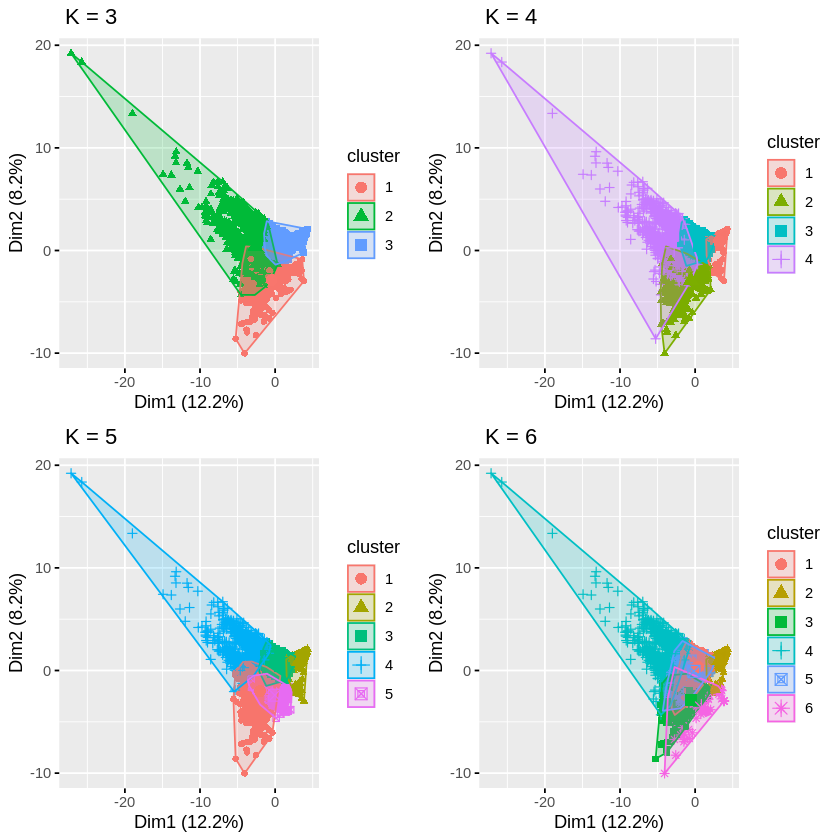

In [43]:
# visualizing the clusters using different values of K
p1 <- fviz_cluster(data_K2, geom = "point", data = data2) + ggtitle(" K = 3")
p2 <- fviz_cluster(data_K3, geom = "point", data = data2) + ggtitle(" K = 4")
p3 <- fviz_cluster(data_K4, geom = "point", data = data2) + ggtitle(" K = 5")
p4 <- fviz_cluster(data_K5, geom = "point", data = data2) + ggtitle(" K = 6")

grid.arrange(p1, p2, p3, p4, nrow = 2)

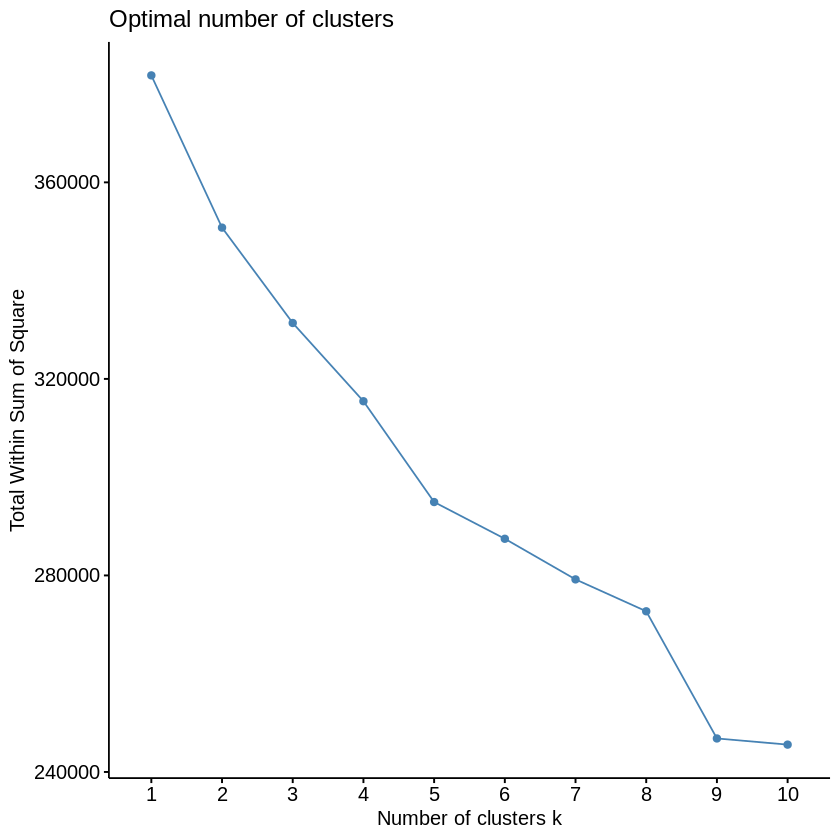

In [44]:
# Determining Optimal clusters (k) Using Elbow method
fviz_nbclust(x = data2,FUNcluster = kmeans, method = 'wss' )


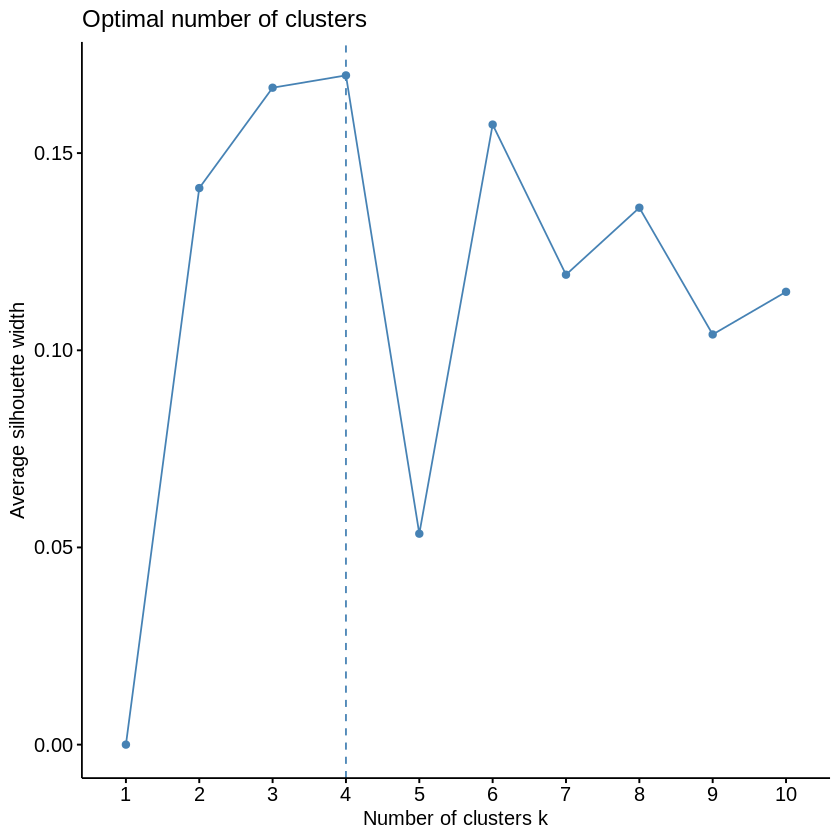

In [45]:
# Determining Optimal clusters (k) Using Average Silhouette Method

fviz_nbclust(x = data2,FUNcluster = kmeans, method = 'silhouette' )

comparing the 2 methods 4 seems to be the optimal point

In [47]:
# Compute k-means clustering with k = 4
set.seed(123)
final <- kmeans(data2, centers = 4, nstart = 25)
print(final)

K-means clustering with 4 clusters of sizes 2204, 987, 1725, 7400

Cluster means:
  Administrative Administrative_Duration Informational Informational_Duration
1     0.86034037              0.69575965     0.8552486              0.7132515
2    -0.68749098             -0.45230636    -0.3878439             -0.2450438
3     0.07079835              0.06066596    -0.1466099             -0.1213044
4    -0.18104915             -0.16103739    -0.1688195             -0.1514727
  ProductRelated ProductRelated_Duration BounceRates  ExitRates PageValues
1      0.9801920               0.9351738  -0.3300185 -0.4591777  0.6784100
2     -0.6483872              -0.5961054   3.1036527  2.8900703 -0.3173633
3     -0.3138242              -0.2956373  -0.4188131 -0.5128934  0.2852792
4     -0.1323025              -0.1301071  -0.2180394 -0.1291528 -0.2262277
   SpecialDay    Month_Aug    Month_Dec  Month_Feb     Month_Jul  Month_June
1 -0.17859769  0.043140956 -0.121591008 -0.1081876  0.0165028562 -0.03464245

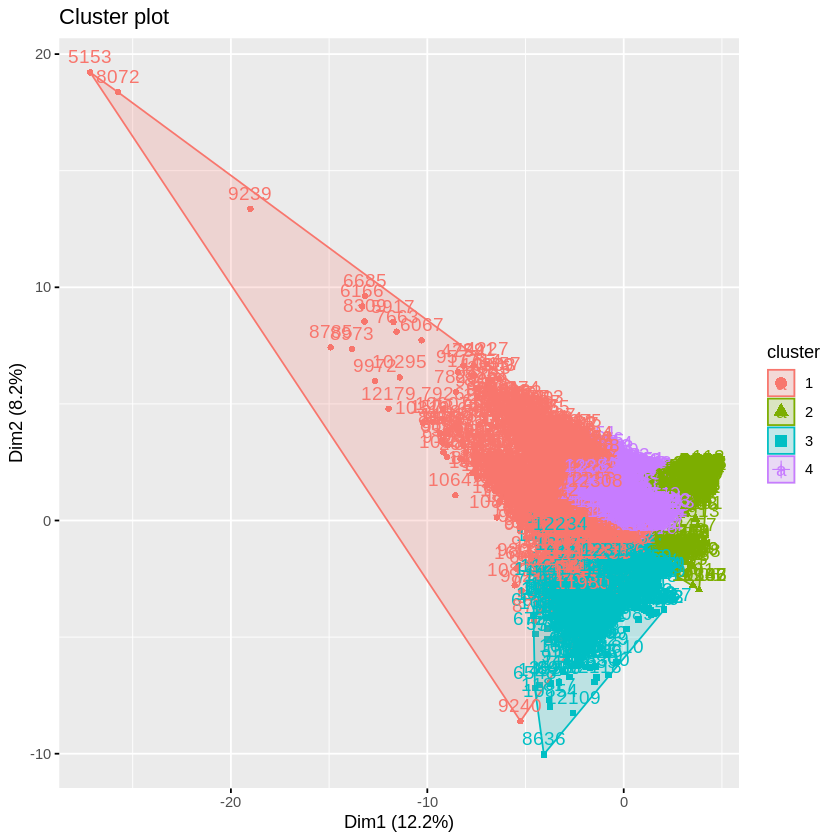

In [48]:
fviz_cluster(final, data = data2)

In [49]:
#We can extract the clusters and add to our initial data to do some descriptive statistics at the cluster level
data2 %>% 
  mutate(Cluster = final$cluster) %>%
  group_by(Cluster) %>%
  summarize_all('median')

Cluster,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,⋯,Browser,Region,TrafficType,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_FALSE,Weekend_TRUE,Revenue_FALSE,Revenue_TRUE
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.50626741,0.1061389,0.3903525,-0.2450294,0.3761742,0.3771657,-0.3921057,-0.5203157,0.1329144,⋯,-0.2081361,-0.47790090,-0.5144557,-0.3993337,-0.0833606,0.410877,0.5505615,-0.5505615,-2.3354836,2.3354836
2,-0.69755332,-0.4574578,-0.3966145,-0.2450294,-0.6914734,-0.6247671,3.6724775,3.2352400,-0.3173633,⋯,-0.2081361,-0.06161775,-0.2659837,-0.3993337,-0.0833606,0.410877,0.5505615,-0.5505615,0.4281421,-0.4281421
3,-0.09564295,-0.1832302,-0.3966145,-0.2450294,-0.4217519,-0.4075506,-0.4574391,-0.6120525,-0.3173633,⋯,-0.2081361,-0.06161775,-0.5144557,2.5039682,-0.0833606,-2.433621,0.5505615,-0.5505615,0.4281421,-0.4281421
4,-0.69755332,-0.4574578,-0.3966145,-0.2450294,-0.3093679,-0.3164699,-0.3713992,-0.2879498,-0.3173633,⋯,-0.2081361,-0.06161775,-0.2659837,-0.3993337,-0.0833606,0.410877,0.5505615,-0.5505615,0.4281421,-0.4281421


# **Hierarchial Clustering**

In [50]:
head(data2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,⋯,Browser,Region,TrafficType,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_FALSE,Weekend_TRUE,Revenue_FALSE,Revenue_TRUE
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.6975533,-0.4574578,-0.3966145,-0.2450294,-0.6914734,-0.6247671,3.67247746,3.2352400,-0.3173633,-0.309001,⋯,-0.7901988,-0.8941841,-0.76292777,-0.3993337,-0.0833606,0.410877,0.5505615,-0.5505615,0.4281421,-0.4281421
2,-0.6975533,-0.4574578,-0.3966145,-0.2450294,-0.6689966,-0.5913358,-0.45743910,1.1745443,-0.3173633,-0.309001,⋯,-0.2081361,-0.8941841,-0.51445574,-0.3993337,-0.0833606,0.410877,0.5505615,-0.5505615,0.4281421,-0.4281421
3,-0.6975533,-0.4631119,-0.3966145,-0.2521304,-0.6914734,-0.6252895,3.67247746,3.2352400,-0.3173633,-0.309001,⋯,-0.7901988,2.4360812,-0.26598370,-0.3993337,-0.0833606,0.410877,0.5505615,-0.5505615,0.4281421,-0.4281421
4,-0.6975533,-0.4574578,-0.3966145,-0.2450294,-0.6689966,-0.6233742,0.57504004,1.9988226,-0.3173633,-0.309001,⋯,-0.2081361,-0.4779009,-0.01751167,-0.3993337,-0.0833606,0.410877,0.5505615,-0.5505615,0.4281421,-0.4281421
5,-0.6975533,-0.4574578,-0.3966145,-0.2450294,-0.4891823,-0.2969835,-0.04444744,0.1441964,-0.3173633,-0.309001,⋯,0.3739266,-0.8941841,-0.01751167,-0.3993337,-0.0833606,0.410877,-1.8161802,1.8161802,0.4281421,-0.4281421
6,-0.6975533,-0.4574578,-0.3966145,-0.2450294,-0.2868911,-0.5442099,-0.13139305,-0.3800157,-0.3173633,-0.309001,⋯,-0.2081361,-0.8941841,-0.26598370,-0.3993337,-0.0833606,0.410877,0.5505615,-0.5505615,0.4281421,-0.4281421


In [51]:
# Before hierarchical clustering, we can compute some descriptive statistics
# ---
# 
desc_stats <- data.frame(
  Min = apply(data2, 2, min),    # minimum
  Med = apply(data2, 2, median), # median
  Mean = apply(data2, 2, mean),  # mean
  SD = apply(data2, 2, sd),      # Standard deviation
  Max = apply(data2, 2, max)     # Maximum
)
desc_stats <- round(desc_stats, 1)
head(desc_stats)

,Min,Med,Mean,SD,Max
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Administrative,-0.7,-0.4,0,1,7.4
Administrative_Duration,-0.5,-0.4,0,1,18.8
Informational,-0.4,-0.4,0,1,18.5
Informational_Duration,-0.3,-0.2,0,1,17.9
ProductRelated,-0.7,-0.3,0,1,15.1
ProductRelated_Duration,-0.6,-0.3,0,1,32.8


In [52]:
# As we don’t want the hierarchical clustering result to depend to an arbitrary variable unit, 
# we start by scaling the data using the R function scale() as follows
# ---
# 
data2 <- scale(data2)
head(data2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,⋯,Browser,Region,TrafficType,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_FALSE,Weekend_TRUE,Revenue_FALSE,Revenue_TRUE
1,-0.6975533,-0.4574578,-0.3966145,-0.2450294,-0.6914734,-0.6247671,3.67247746,3.2352400,-0.3173633,-0.309001,⋯,-0.7901988,-0.8941841,-0.76292777,-0.3993337,-0.0833606,0.410877,0.5505615,-0.5505615,0.4281421,-0.4281421
2,-0.6975533,-0.4574578,-0.3966145,-0.2450294,-0.6689966,-0.5913358,-0.45743910,1.1745443,-0.3173633,-0.309001,⋯,-0.2081361,-0.8941841,-0.51445574,-0.3993337,-0.0833606,0.410877,0.5505615,-0.5505615,0.4281421,-0.4281421
3,-0.6975533,-0.4631119,-0.3966145,-0.2521304,-0.6914734,-0.6252895,3.67247746,3.2352400,-0.3173633,-0.309001,⋯,-0.7901988,2.4360812,-0.26598370,-0.3993337,-0.0833606,0.410877,0.5505615,-0.5505615,0.4281421,-0.4281421
4,-0.6975533,-0.4574578,-0.3966145,-0.2450294,-0.6689966,-0.6233742,0.57504004,1.9988226,-0.3173633,-0.309001,⋯,-0.2081361,-0.4779009,-0.01751167,-0.3993337,-0.0833606,0.410877,0.5505615,-0.5505615,0.4281421,-0.4281421
5,-0.6975533,-0.4574578,-0.3966145,-0.2450294,-0.4891823,-0.2969835,-0.04444744,0.1441964,-0.3173633,-0.309001,⋯,0.3739266,-0.8941841,-0.01751167,-0.3993337,-0.0833606,0.410877,-1.8161802,1.8161802,0.4281421,-0.4281421
6,-0.6975533,-0.4574578,-0.3966145,-0.2450294,-0.2868911,-0.5442099,-0.13139305,-0.3800157,-0.3173633,-0.309001,⋯,-0.2081361,-0.8941841,-0.26598370,-0.3993337,-0.0833606,0.410877,0.5505615,-0.5505615,0.4281421,-0.4281421


In [53]:
# We now use the R function hclust() for hierarchical clustering
# ---
# 

# First we use the dist() function to compute the Euclidean distance between observations, 
# d will be the first argument in the hclust() function dissimilarity matrix
# ---
#
d <- dist(data2, method = "euclidean")

In [54]:
# We then hierarchical clustering using the Ward's method
# ---
# 
res.hc <- hclust(d, method = "ward.D2" )

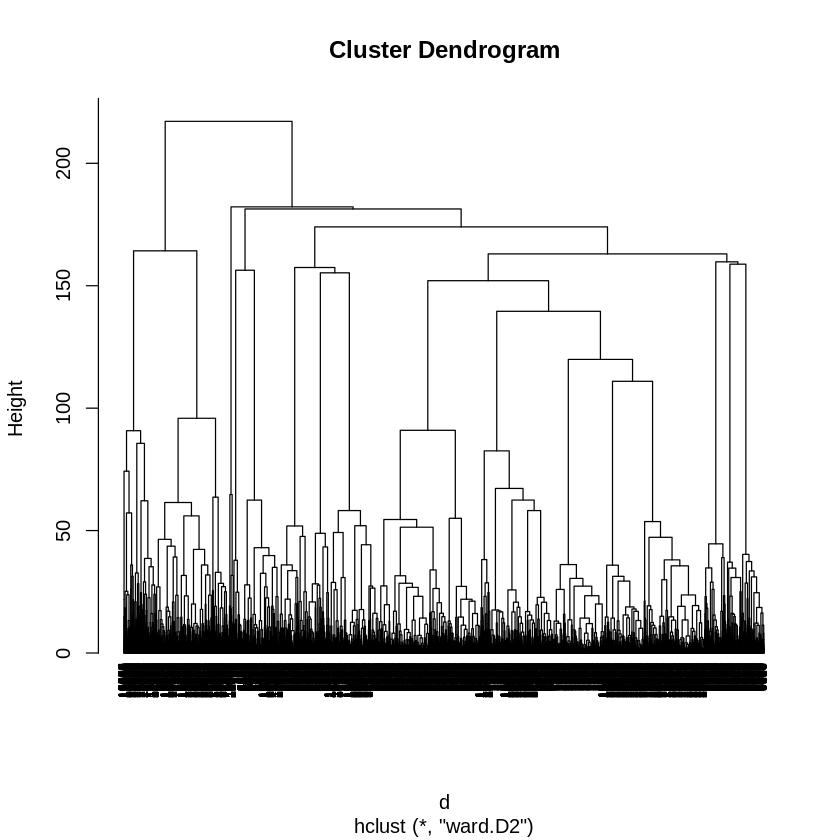

In [55]:
# Lastly, we plot the obtained dendrogram
# ---
# 
plot(res.hc, cex = 0.6, hang = -1)

In [56]:
# hierarchial clustering using the centroid method
res.hc1 <- hclust(d, method = "centroid" )

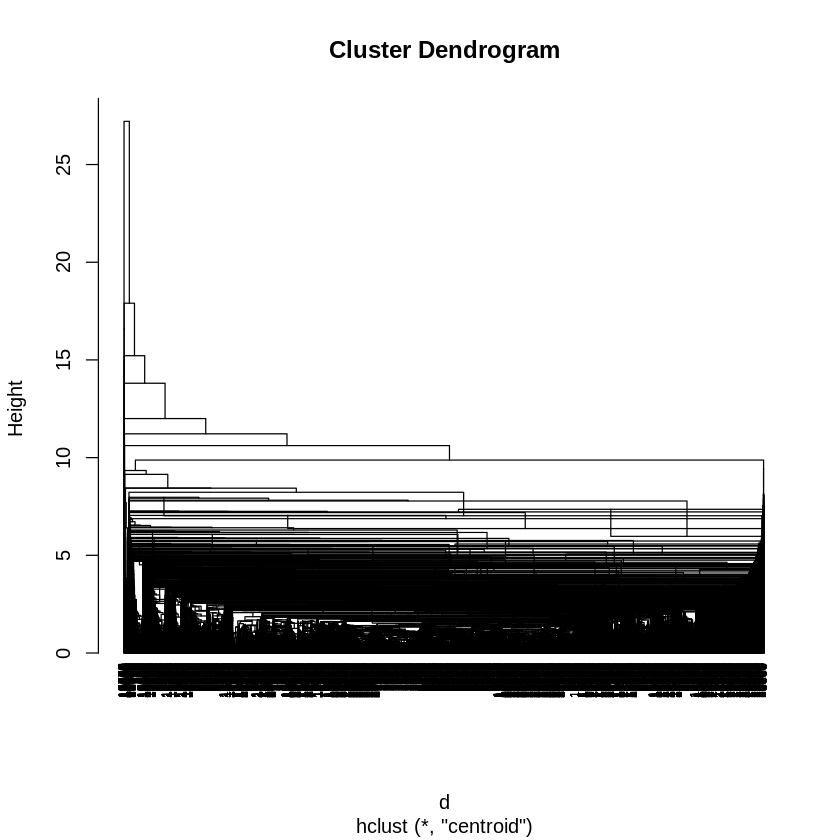

In [57]:
# Lastly, we plot the obtained dendrogram
# ---
# 
plot(res.hc1, cex = 0.6, hang = -1)

# **8.Follow Up Questions**

a) Did we have the Correct data

Yes

b) Do we need any additional data

Yes

# **Conclusions**

The results obtained were correct and we were able to compare the clustering using K-means and Hierarchial Clustering